<a href="https://colab.research.google.com/github/sunmarknatecom/colaboratory/blob/master/lung_separation3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install pydicom


     |████████████████████████████████| 35.1MB 88kB/s 


In [3]:
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [0]:
def create_dataset(a, b, c, d):
    df_list = []
    for i in range(c): # c
        path = "./drive/My Drive/dataset/" + d
        fn = "/IM-0001-0%03d.dcm" %(i+1)
        filename = path + fn
        ds = pydicom.dcmread(filename)
        df = ds.pixel_array
        df_list.append(df)
    df_list = np.array(df_list)
    x_train = df_list.reshape(df_list.shape[0], 512, 512, 1).astype('float32')

    y_train = np.zeros((c), dtype=int) # c
    for i in range(a-1, b): # a+1, b
        y_train[i] = 1

    return x_train, y_train

In [0]:
x_train_1, y_train_1 = create_dataset(71,128,275,"pt01")
x_train_2, y_train_2 = create_dataset(69,130,263,"pt02")
x_train_3, y_train_3 = create_dataset(1,213,262,"pt04")
x_test, y_test = create_dataset(71,144,285,"pt03")

In [8]:
y_train_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
np.shape(y_train_3)

(262,)

In [0]:
for i in range(213):
    y_train_3[i] = 0
for i in range(49):
    y_train_3[i+213] = 1

In [12]:
y_train_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
# data preparation
# import pydicom
# import matplotlib.pyplot as plt
# ds_list = []
# for i in range(782):
#     fn = pydicom.dcmread("000%03d.dcm" %i)
#     ds = fn.pixel_array
#     plt.imshow(ds, interpolation='bicubic', cmap='Greys')
#     plt.title("%03d" %i)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()

# 01 71-128 275 (lung not_lung)
# 02 69-130 263 (lung not_lung)
# 03 71-144 285 (lung not_lung)
# 04 1-213(not lung) 263 (lung)

In [0]:
x_train = np.concatenate((x_train_1, x_train_2), axis=0)
x_train = np.concatenate((x_train_3, x_train), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)
y_train = np.concatenate((y_train_3, y_train), axis=0)

In [17]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 510, 510, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 508, 508, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 252, 252, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 250, 250, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 125, 125, 128)     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 123, 123, 256)    

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=25)

Train on 800 samples, validate on 285 samples
Epoch 1/20
800/800 [==============================] - 68s 84ms/sample - loss: 68.7841 - acc: 0.7437 - val_loss: 0.5342 - val_acc: 0.7404
Epoch 2/20
800/800 [==============================] - 63s 78ms/sample - loss: 0.5600 - acc: 0.7600 - val_loss: 0.5011 - val_acc: 0.7404
Epoch 3/20
800/800 [==============================] - 63s 78ms/sample - loss: 0.3902 - acc: 0.8025 - val_loss: 0.1556 - val_acc: 0.9333
Epoch 4/20
800/800 [==============================] - 63s 78ms/sample - loss: 0.2624 - acc: 0.8875 - val_loss: 0.1411 - val_acc: 0.9263
Epoch 5/20
800/800 [==============================] - 62s 78ms/sample - loss: 0.1750 - acc: 0.9362 - val_loss: 0.1590 - val_acc: 0.9404
Epoch 6/20
800/800 [==============================] - 62s 78ms/sample - loss: 0.1223 - acc: 0.9613 - val_loss: 0.0624 - val_acc: 0.9684
Epoch 7/20
800/800 [==============================] - 62s 78ms/sample - loss: 0.1287 - acc: 0.9613 - val_loss: 0.2639 - val_acc: 0.8982
E

In [21]:
model.evaluate(x_test, y_test)

285/285 [==============================] - 25s 89ms/sample - loss: 0.0629 - acc: 0.9860


[0.06291453907952571, 0.9859649]

In [25]:
model.predict(x_train[250].reshape(1, 512, 512, 1))

array([[0.9999386]], dtype=float32)

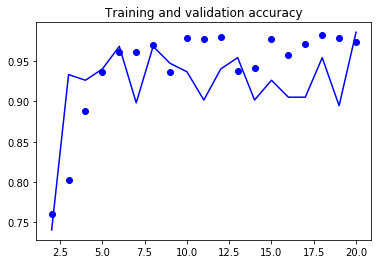

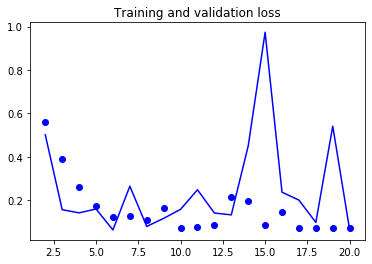

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_n = range(2,len(acc)+1)

plt.plot(epochs_n, acc[1:], 'bo', label='training_accuracy')
plt.plot(epochs_n, val_acc[1:], 'b', label='val_accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs_n, loss[1:], 'bo', label='training_loss')
plt.plot(epochs_n, val_loss[1:], 'b', label='val_loss')
plt.title('Training and validation loss')
plt.show()

In [0]:
model.save('./drive/My Drive/lung_separation_2.h5')

In [28]:
import os
os.getcwd()

'/content'

In [0]:
from tensorflow.keras.models import load_model
import tensorflow as tf

In [32]:
model = load_model('./drive/My Drive/lung_separation_2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [35]:
model.predict(x_train[252].reshape(1, 512, 512, 1))

array([[0.99983096]], dtype=float32)

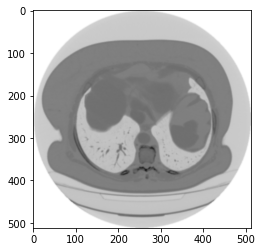

In [36]:
plt.imshow(x_train[252].reshape(512,512), interpolation='bicubic', cmap='Greys')
plt.show()

In [0]:
from tensorflow.keras.preprocessing import image
img = x_train[252]
img = img.reshape(1, 512, 512, 1)

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2

img_ch = cv2.merge([img, img, img])
x = preprocess_input(img_ch)

In [0]:
preds = model.predict(img)

In [0]:
last_conv_layer = model.get_layer('conv2d_25')

In [0]:
preds = model.predict(x_train[120].reshape(1, 512, 512, 1))

In [44]:
preds[0]

array([0.00037077], dtype=float32)

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

In [51]:
img = x_train[250].reshape(512, 512)
np.shape(img)

(512, 512)

In [0]:
import cv2

img_new = cv2.merge([img, img, img])

In [53]:
np.shape(img_new)

(512, 512, 3)

In [0]:
img_tensor = np.expand_dims(img_new, axis=0)

In [55]:
np.shape(img_tensor)

(1, 512, 512, 3)

In [0]:
img_tensor /=np.max(img_tensor)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


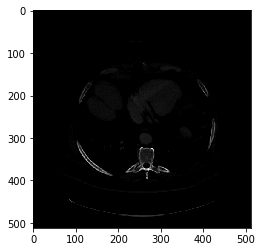

In [57]:
plt.imshow(img_tensor[0])
plt.show()

In [0]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]

In [0]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
img_tensor = img_tensor.reshape(512, 512, 3)

In [0]:
r, g, b = cv2.split(img_tensor)


In [0]:
new_img_tensor = r.reshape(1, 512, 512, 1)

In [0]:
activations = activation_model.predict(new_img_tensor)

In [0]:
first_layer_activation = activations[0]

In [66]:
np.shape(first_layer_activation)

(1, 510, 510, 64)

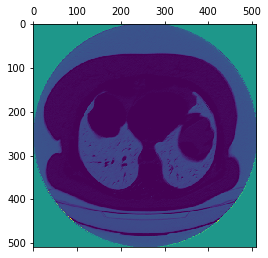

In [67]:
plt.matshow(first_layer_activation[0,:,:,43], cmap='viridis')

In [0]:
second_layer_activation = activations[1]

In [69]:
np.shape(second_layer_activation)

(1, 508, 508, 64)

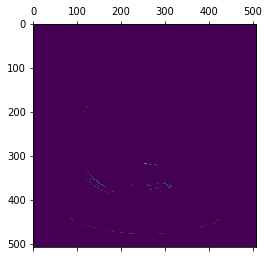

In [70]:
plt.matshow(second_layer_activation[0,:,:,14], cmap='viridis')

In [71]:
len(activations)

8

In [0]:
eighth_layer_activation  = activations[7]

In [73]:
np.shape(eighth_layer_activation)

(1, 121, 121, 256)

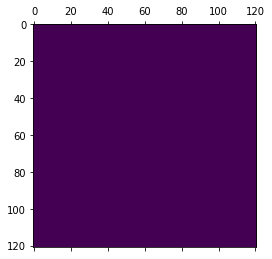

In [74]:
plt.matshow(eighth_layer_activation[0,:,:,100], cmap='viridis')